In [54]:
import os
from matplotlib import pyplot

from model.FaceDetector import CFaceDetector
from model.utils import show_bboxes
from PIL import Image

obj = CFaceDetector()

CFaceDetector is initialized


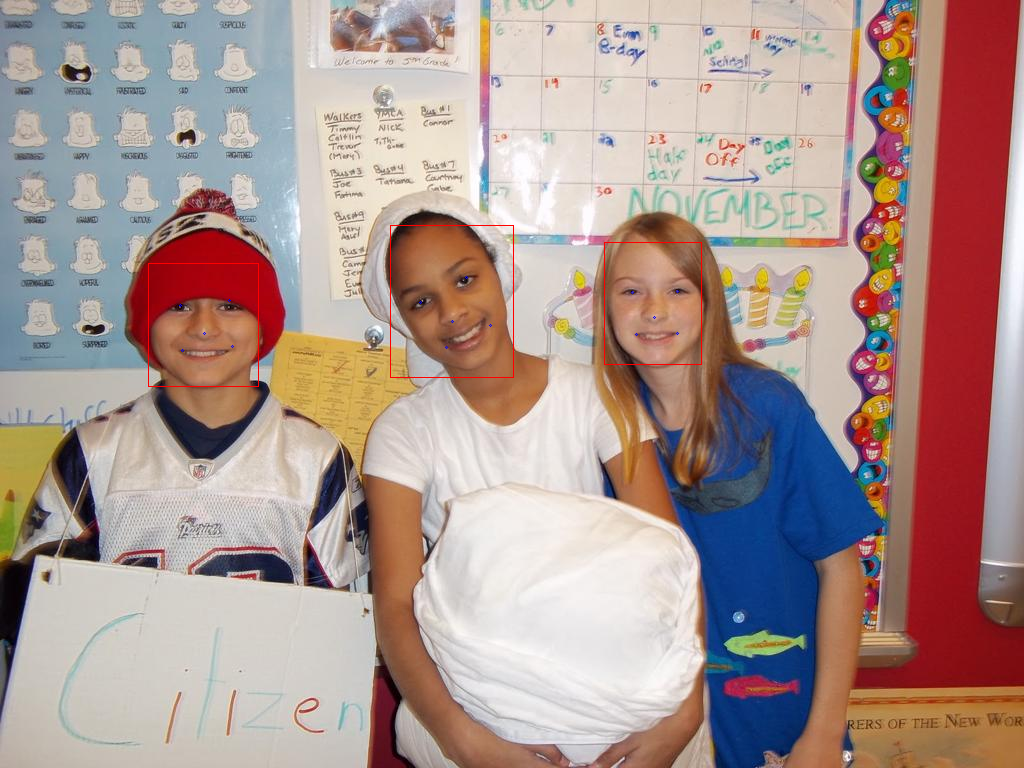

In [55]:
oImg = Image.open('images/test8.jpg')
bounding_boxes, landmarks = obj.detect_faces(oImg, min_face_size=100.0)
show_bboxes(oImg, bounding_boxes, landmarks)

### Get the total number of faces in an image

In [56]:
print(bounding_boxes.shape)
print(bounding_boxes)

(3, 5)
[[148.49756367 263.87012753 258.41518833 386.86462572   0.99996901]
 [390.84420527 225.59847403 513.30229111 377.29818922   0.99975854]
 [604.90807141 242.25578909 701.424932   364.40768007   0.99901211]]


### Crop the face images by adding the margin

In [62]:
image_size=260
margin=80

listFaceOjects = list()

for box in bounding_boxes:
    oFace = obj.extract_face(oImg, box, image_size, margin)
    #oFace.save('temp.jpg')
    #oFace.show()
    listFaceOjects.append(oFace)
    #break
    
print('Face detected: ', len(listFaceOjects))
# plot faces


Face detected:  3


Images: 3 Rows: 1 Cols: 3


True

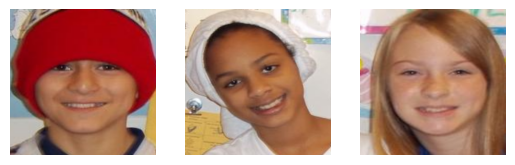

In [63]:
# plot a list of loaded faces
def plot_faces(listFaceOjects, nImages , nRows):
	nCols = int(nImages/nRows)
	print('Images:', nImages, 'Rows:', nRows, 'Cols:', nCols)
	for i in range(nRows*nCols):
		# define subplot
		pyplot.subplot(nRows, nCols, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(listFaceOjects[i])
		#break

	#pyplot.show()
	return True

nImages = len(listFaceOjects)

listRows = [5, 4, 3, 2, 1]
nRows = 1
if nImages > listRows[0]:
	for r in listRows:
		if nImages%r == 0:
			print(r)
			nRows = nImages/r
			break

plot_faces(listFaceOjects, nImages, int(nRows))